<a href="https://colab.research.google.com/github/NyaHardy/ML_Housing-_Prediction_/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [172]:
df1 = pd.read_csv("/content/house_data.csv")
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [173]:
df1.shape

(4600, 18)

In [174]:
df1.groupby('city')['city'].agg('count')

,city
city,
Algona,5
Auburn,176
Beaux Arts Village,1
Bellevue,286
Black Diamond,9
Bothell,33
Burien,74
Carnation,22
Clyde Hill,11


Dropping unnessary columns

In [175]:
df2= df1.drop(['date','sqft_lot','view','condition','country'],axis='columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,0,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [176]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,0,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [177]:
df2.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
floors,0
waterfront,0
sqft_above,0
sqft_basement,0
yr_built,0
yr_renovated,0


In [178]:
df2['bedrooms'].unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

In [179]:
df2[df2.bedrooms==0]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
2365,1095000.0,0.0,0.0,3064,3.5,0,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102
3209,1295648.0,0.0,0.0,4810,2.0,0,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053


In [180]:
df3= df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['sqft_living']
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,2.335821e+07
1,2384000.0,5.0,2.50,3650,2.0,0,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,6.531507e+07
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,1.772021e+07
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2.100000e+07
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,2.835052e+07


In [181]:
len(df3.city.unique())

44

In [182]:
#viewing the number of lisiting for each city
df3.city = df3.city.apply(lambda x: x.strip())
city_stats = df3['city'].value_counts().sort_values(ascending=False)
city_stats

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


In [183]:
len(city_stats[city_stats<=10])

11

In [184]:
df3.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,2.335821e+07
1,2384000.0,5.0,2.50,3650,2.0,0,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,6.531507e+07
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,1.772021e+07
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2.100000e+07
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,2.835052e+07
5,490000.0,2.0,1.00,880,1.0,0,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,5.568182e+07
6,335000.0,2.0,2.00,1350,1.0,0,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,2.481481e+07
7,482000.0,4.0,2.50,2710,2.0,0,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,1.778598e+07
8,452500.0,3.0,2.50,2430,1.0,0,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,1.862140e+07
9,640000.0,4.0,2.00,1520,1.5,0,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,4.210526e+07


In [185]:
df3[df3.sqft_living/df3.bedrooms<300].head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft
115,340000.0,5.0,1.0,1120,1.5,0,1120,0,1962,0,14150 75th Ave NE,Kirkland,WA 98034,3.035714e+07
221,191000.0,3.0,1.5,800,1.0,0,800,0,1959,0,1003 SW 307th St,Federal Way,WA 98023,2.387500e+07
665,160000.0,3.0,1.0,860,1.0,0,860,0,1963,0,27204 116th Pl SE,Kent,WA 98030,1.860465e+07
762,295000.0,3.0,1.5,850,1.0,0,850,0,1986,0,4020 21st Ave SW,Seattle,WA 98106,3.470588e+07
795,239950.0,5.0,1.0,1460,2.0,0,1460,0,1941,1998,13012 41st Ave S,Tukwila,WA 98168,1.643493e+07


In [186]:
df3.shape

(4600, 14)

Removing outliars

In [187]:
#Removing outliars
df4 = df3[~(df3.sqft_living/df3.bedrooms<300)]
df4.shape

(4565, 14)

In [188]:
df4.price_per_sqft.describe()

,price_per_sqft
count,4.565000e+03
mean,2.652594e+07
std,3.578233e+07
min,0.000000e+00
25%,1.805556e+07
50%,2.434783e+07
75%,3.146341e+07
max,2.253390e+09


In [189]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(3811, 14)

In [190]:
df5.price_per_sqft.describe()

,price_per_sqft
count,3.811000e+03
mean,2.553081e+07
std,8.810170e+06
min,0.000000e+00
25%,1.865347e+07
50%,2.441767e+07
75%,3.079735e+07
max,7.146617e+07


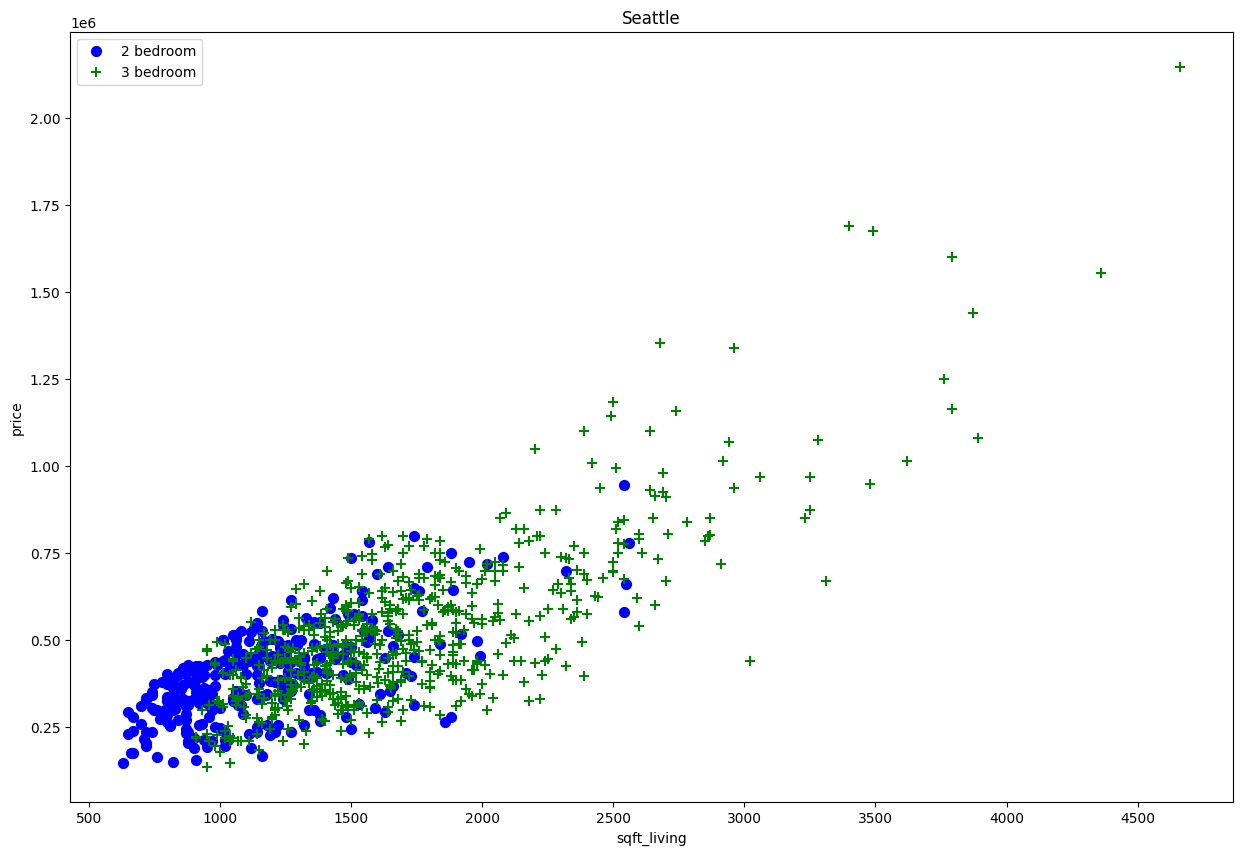

In [191]:
def plot_scatter_chart(df, city):
  bedroom2 = df[(df.city==city) & (df.bedrooms==2)]
  bedroom3 = df[(df.city==city) & (df.bedrooms==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bedroom2.sqft_living, bedroom2.price, color='blue', label='2 bedroom', s=50)
  plt.scatter(bedroom3.sqft_living, bedroom3.price, marker='+', color='green', label='3 bedroom', s=50)
  plt.xlabel("sqft_living")
  plt.ylabel("price")
  plt.title(city)
  plt.legend()

plot_scatter_chart(df5,"Seattle")

Text(0, 0.5, 'count')

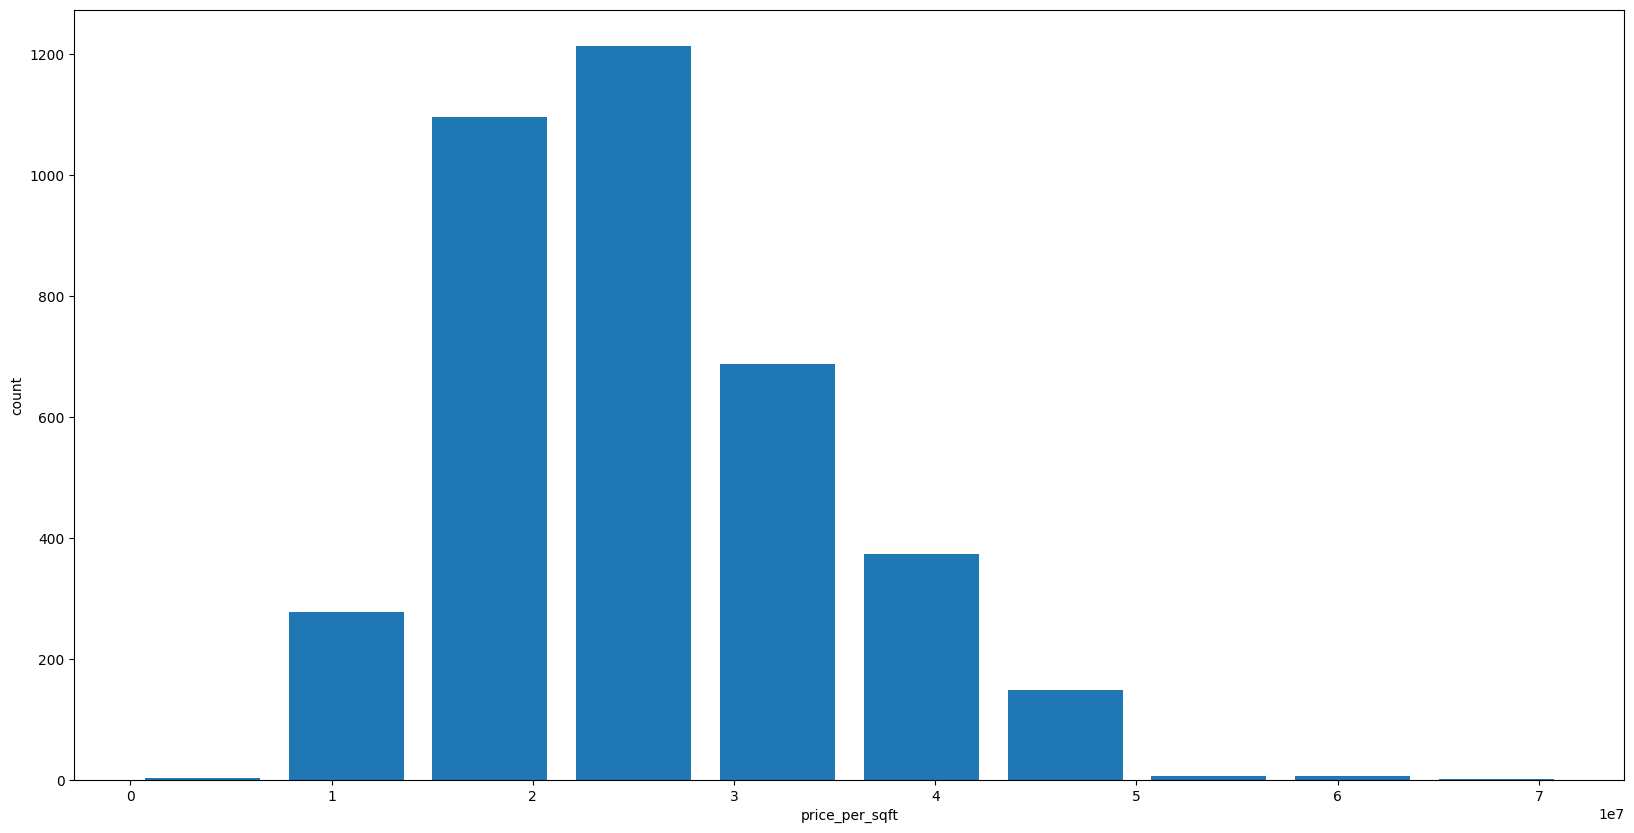

In [192]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

Continuing the cleaning of the outliers by eliminating all homes with odd deatils.

In [193]:
df5.bathrooms.unique()

array([1.  , 2.5 , 3.  , 2.  , 1.75, 2.75, 1.5 , 3.5 , 2.25, 3.25, 4.25,
       5.  , 3.75, 5.5 , 4.  , 4.5 , 5.25, 0.75, 5.75, 4.75, 0.  , 1.25,
       6.25])

In [194]:
df5[df5.bathrooms< 1]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft
466,80000.0,1.0,0.75,430,1.0,0,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,1.860465e+07
1080,100000.0,2.0,0.75,660,1.0,0,660,0,1912,1989,749 1st Ave N,Kent,WA 98032,1.515152e+07
1660,1295648.0,0.0,0.00,4810,2.0,0,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,2.693655e+07
2300,230000.0,2.0,0.75,650,1.0,0,650,0,1931,0,13540 Burke Ave N,Seattle,WA 98133,3.538462e+07
2464,360000.0,2.0,0.75,850,1.0,0,550,300,1909,1988,2458 S Ferdinand St,Seattle,WA 98108,4.235294e+07
2873,1095000.0,0.0,0.00,3064,3.5,0,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,3.573760e+07
3113,402101.0,2.0,0.75,1020,2.0,0,1020,0,2009,0,902 26th Ave S,Seattle,WA 98144,3.942167e+07
3152,562100.0,2.0,0.75,1440,1.0,0,1200,240,1914,1996,5641-5645 6th Ave NW,Seattle,WA 98107,3.903472e+07
3163,190000.0,1.0,0.75,930,1.0,0,930,0,1941,1994,7650 S 134th St,Seattle,WA 98178,2.043011e+07
3704,350000.0,2.0,0.75,1392,1.5,0,1392,0,1978,2000,17404 94th Ave SW,Vashon,WA 98070,2.514368e+07


Text(0, 0.5, 'count')

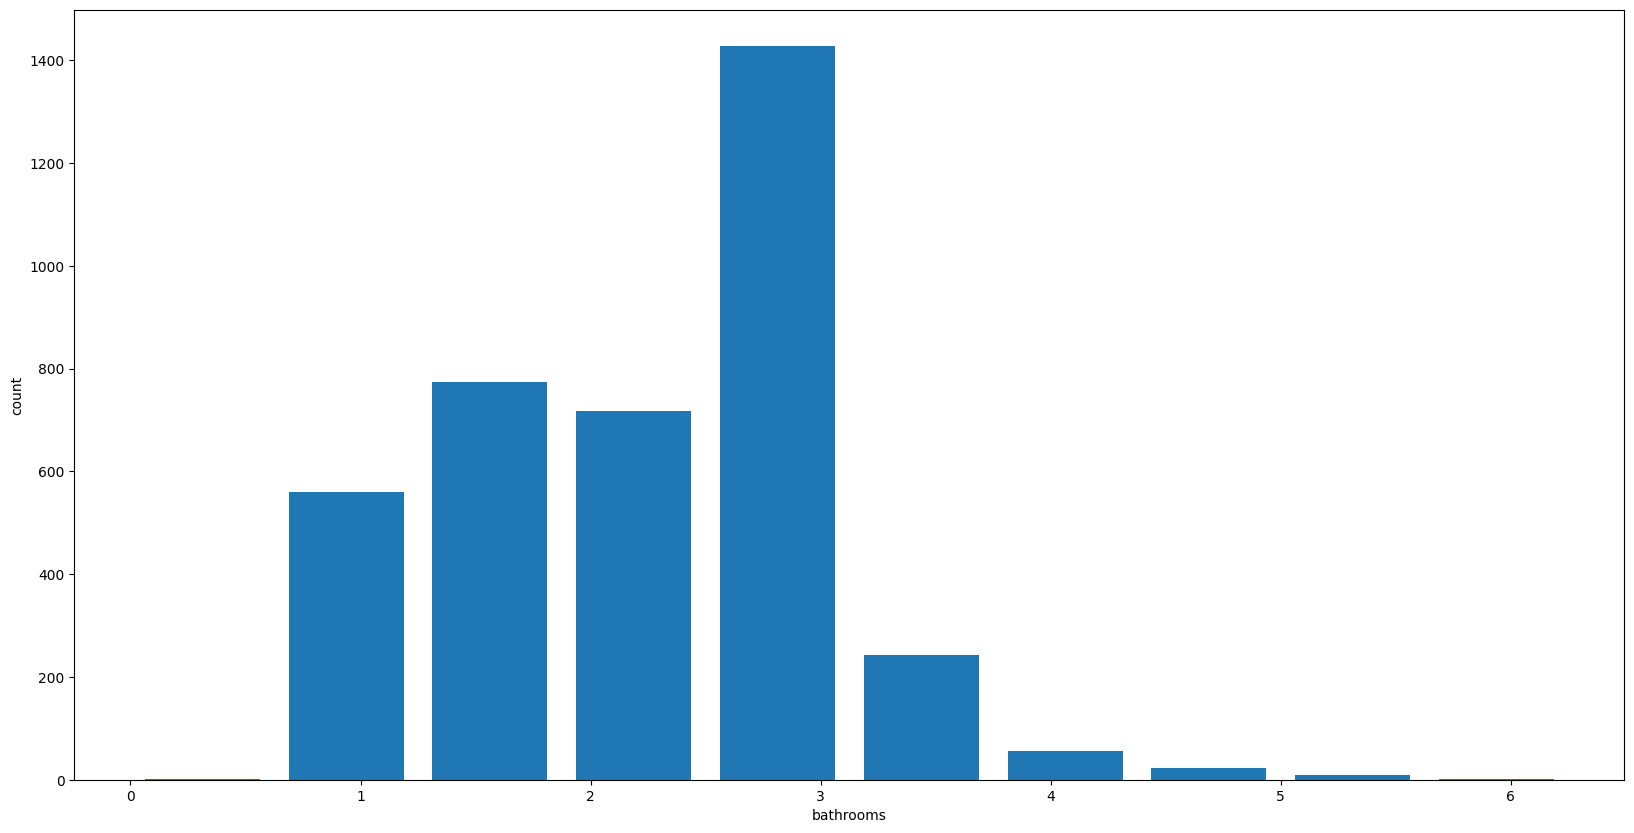

In [195]:
plt.hist(df5.bathrooms,rwidth=0.8)
plt.xlabel("bathrooms")
plt.ylabel("count")

In [196]:
df5[df5.bathrooms<1]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft
466,80000.0,1.0,0.75,430,1.0,0,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,1.860465e+07
1080,100000.0,2.0,0.75,660,1.0,0,660,0,1912,1989,749 1st Ave N,Kent,WA 98032,1.515152e+07
1660,1295648.0,0.0,0.00,4810,2.0,0,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,2.693655e+07
2300,230000.0,2.0,0.75,650,1.0,0,650,0,1931,0,13540 Burke Ave N,Seattle,WA 98133,3.538462e+07
2464,360000.0,2.0,0.75,850,1.0,0,550,300,1909,1988,2458 S Ferdinand St,Seattle,WA 98108,4.235294e+07
2873,1095000.0,0.0,0.00,3064,3.5,0,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,3.573760e+07
3113,402101.0,2.0,0.75,1020,2.0,0,1020,0,2009,0,902 26th Ave S,Seattle,WA 98144,3.942167e+07
3152,562100.0,2.0,0.75,1440,1.0,0,1200,240,1914,1996,5641-5645 6th Ave NW,Seattle,WA 98107,3.903472e+07
3163,190000.0,1.0,0.75,930,1.0,0,930,0,1941,1994,7650 S 134th St,Seattle,WA 98178,2.043011e+07
3704,350000.0,2.0,0.75,1392,1.5,0,1392,0,1978,2000,17404 94th Ave SW,Vashon,WA 98070,2.514368e+07


In [197]:
df6= df5[df5.bathrooms>1]
df6.shape

(3250, 14)

In [198]:
df7 = df6.drop(['price_per_sqft'],axis='columns')
df7.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
1,262000.0,4.0,2.5,2020,2.0,0,2020,0,2002,0,434 Pullman Ave,Algona,WA 98001
2,248000.0,4.0,3.0,2163,2.0,0,2163,0,2006,0,429 Milwaukee Blvd S,Algona,WA 98001
3,196440.0,3.0,2.0,1560,1.0,0,1560,0,1992,0,130 Main St,Algona,WA 98001


In [199]:
X = df7.drop(['price', 'street', 'statezip','city'], axis=1)
y = df7['price']

- Machine Learning

In [200]:
dummies = pd.get_dummies(df7.city)
dummies.head(3)

,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
city_stats2 = df7['city'].value_counts().sort_values(ascending=False)
city_stats2

,count
city,
Seattle,1058
Bellevue,220
Renton,197
Redmond,180
Kent,164
Sammamish,150
Kirkland,145
Issaquah,130
Auburn,121


In [202]:
df8 = pd.concat([df7,dummies.drop('Skykomish',axis= 'columns')],axis='columns')
df8.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
1,262000.0,4.0,2.5,2020,2.0,0,2020,0,2002,0,...,False,False,False,False,False,False,False,False,False,False
2,248000.0,4.0,3.0,2163,2.0,0,2163,0,2006,0,...,False,False,False,False,False,False,False,False,False,False
3,196440.0,3.0,2.0,1560,1.0,0,1560,0,1992,0,...,False,False,False,False,False,False,False,False,False,False


In [203]:
df9 = df8.drop('city',axis='columns')
df9.head(2)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
1,262000.0,4.0,2.5,2020,2.0,0,2020,0,2002,0,...,False,False,False,False,False,False,False,False,False,False
2,248000.0,4.0,3.0,2163,2.0,0,2163,0,2006,0,...,False,False,False,False,False,False,False,False,False,False


In [204]:
df8.shape

(3250, 53)

In [205]:
x = df8.drop(['price','street','statezip'],axis=1)
x.head(3)

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
1,4.0,2.5,2020,2.0,0,2020,0,2002,0,Algona,...,False,False,False,False,False,False,False,False,False,False
2,4.0,3.0,2163,2.0,0,2163,0,2006,0,Algona,...,False,False,False,False,False,False,False,False,False,False
3,3.0,2.0,1560,1.0,0,1560,0,1992,0,Algona,...,False,False,False,False,False,False,False,False,False,False


In [206]:
y = df8['price']
y.head()

,price
1,262000.0
2,248000.0
3,196440.0
4,367500.0
5,331950.0


In [207]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_features = [
    'bedrooms','bathrooms','sqft_living','floors',
    'waterfront','sqft_above','sqft_basement',
    'yr_built','yr_renovated'
]

categorical_features = ['city']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
model.score(x_test, y_test)

0.7849146416258056

see if this needs to be changed or removed once up

In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

# Identify column types
num_cols = x.select_dtypes(include='number').columns
cat_cols = x.select_dtypes(exclude='number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(model, x, y, cv=cv)


In [211]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

numeric_features = [
    'bedrooms','bathrooms','sqft_living','floors',
    'waterfront','sqft_above','sqft_basement',
    'yr_built','yr_renovated'
]

categorical_features = ['city']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)


In [212]:
#Testing for the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('preprocess', preprocessor),
                ('model', LinearRegression())
            ]),
            'params': {}
        },
        'lasso': {
            'model': Pipeline([
                ('preprocess', preprocessor),
                ('model', Lasso())
            ]),
            'params': {
                'model__alpha': [1, 2]
            }
        },
        'decision_tree': {
            'model': Pipeline([
                ('preprocess', preprocessor),
                ('model', DecisionTreeRegressor())
            ]),
            'params': {
                'model__criterion': ['squared_error', 'friedman_mse']
            }
        }
    }

    scores = []
    best_estimator = None
    best_score = float('-inf')

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(x, y)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

        if gs.best_score_ > best_score:
            best_score = gs.best_score_
            best_estimator = gs.best_estimator_

    return pd.DataFrame(scores), best_estimator


In [213]:
results_df, best_model = find_best_model_using_gridsearchcv(x, y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20903334025278.586, tolerance: 24088615582.07866
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21082898032685.934, tolerance: 23914730924.101295
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9558160016600.992, tolerance: 23674904804.472332
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: Conv

In [214]:
def predict_price(city, sqft_living, bathrooms, bedrooms):
    input_dict = {
        'city': city,
        'sqft_living': sqft_living,
        'bathrooms': bathrooms,
        'bedrooms': bedrooms,
        'floors': 0,
        'sqft_above': 0,
        'sqft_basement': 0,
        'yr_built': 0,
        'yr_renovated': 0,
        'waterfront': 0
    }

    input_df = pd.DataFrame([input_dict])

    return best_model.predict(input_df)[0]


In [215]:
predict_price('Seattle', 800, 1, 1)

np.float64(2967987.5331746587)